In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import matplotlib.colors as meepo

In [3]:
clf = joblib.load('models/train_AGN.joblib')
features = pd.read_parquet('test_sample/test_AGN_features.parquet').dropna()
data = pd.read_parquet('test_sample/test_sample.parquet')
features['target'] = data['target']
X, y = features.iloc[:, 1:-1], np.where(features['target']==2332, 1, 0)

features.head()

array([0, 0, 1, ..., 0, 1, 0])

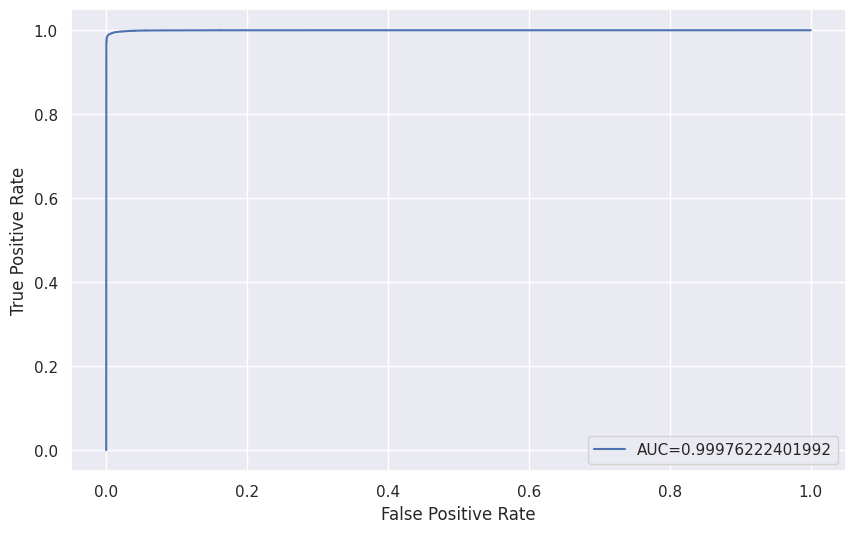

The most top left point on the ROC curve correspond to threshold  0.1954012328718148


In [5]:
#define metrics
proba = clf.predict_proba(X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y,  proba)
auc = metrics.roc_auc_score(y, proba)

#create ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

optimal_threshold = _[np.argmin((fpr)**2 + (1-tpr)**2)]
print("The most top left point on the ROC curve correspond to threshold ", optimal_threshold)

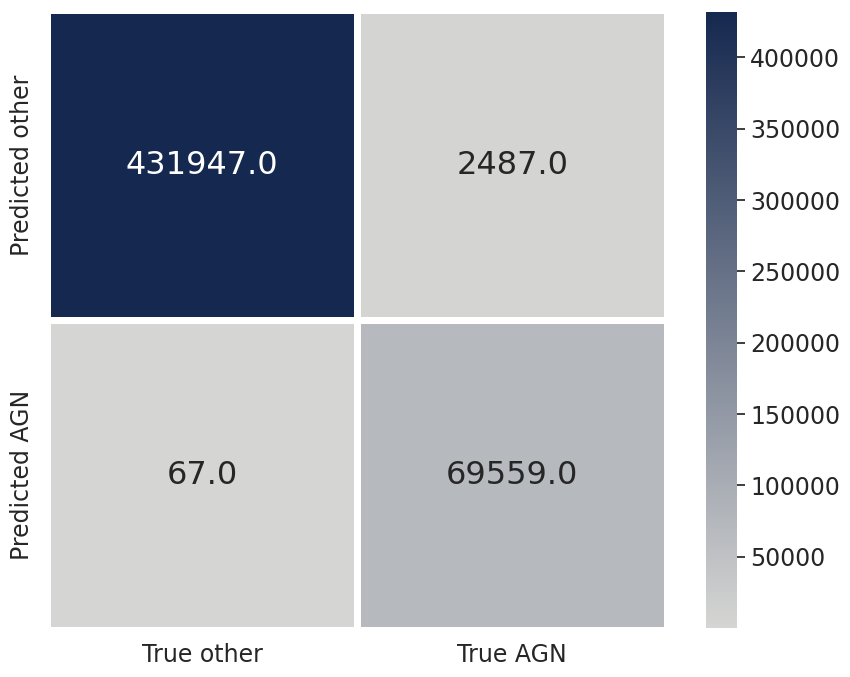

In [6]:
normalize = False

thresh = .5
proba = clf.predict_proba(X)[:, 1]
pred = np.where(proba>thresh, 1, 0)

if normalize:
    conf = confusion_matrix(pred, y, normalize='all')
    conf = conf*100
else:
    conf = confusion_matrix(pred, y)

myColors = ('#D5D5D3', '#15284F')
mymap = meepo.LinearSegmentedColormap.from_list('Custom', myColors, 500)

sns.set(rc = {'figure.figsize':(10,10)})
fig, ax0 = plt.subplots(1,1)

ax = sns.heatmap(conf, annot=True, fmt = '.1f', square=1, linewidth=5, annot_kws={"size":23},\
                 cmap=mymap, cbar_kws={"shrink": 0.8})

ax.set_xticklabels(labels=['True other', 'True AGN'], fontsize=17)
ax.set_yticklabels(labels=['Predicted other', 'Predicted AGN'], fontsize=17)

if normalize:
    for t in ax.texts: t.set_text(t.get_text() + " %")

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)


In [7]:
importance = clf.feature_importances_
cols = X.columns
importance, cols = zip(*sorted(zip(importance, cols), reverse=True))

print('Ten most important features :\n')
for idx, col in enumerate(cols[:10]):
        print(f"{col} : {importance[idx]:.3f}")

Ten most important features :

peak_0 : 0.068
mean_snr_0 : 0.058
std_2 : 0.056
std_color : 0.055
peak_2 : 0.054
peak_3 : 0.052
mean_snr_2 : 0.051
hostgal_dist : 0.051
mean_snr_3 : 0.047
hostgal_zphot : 0.045


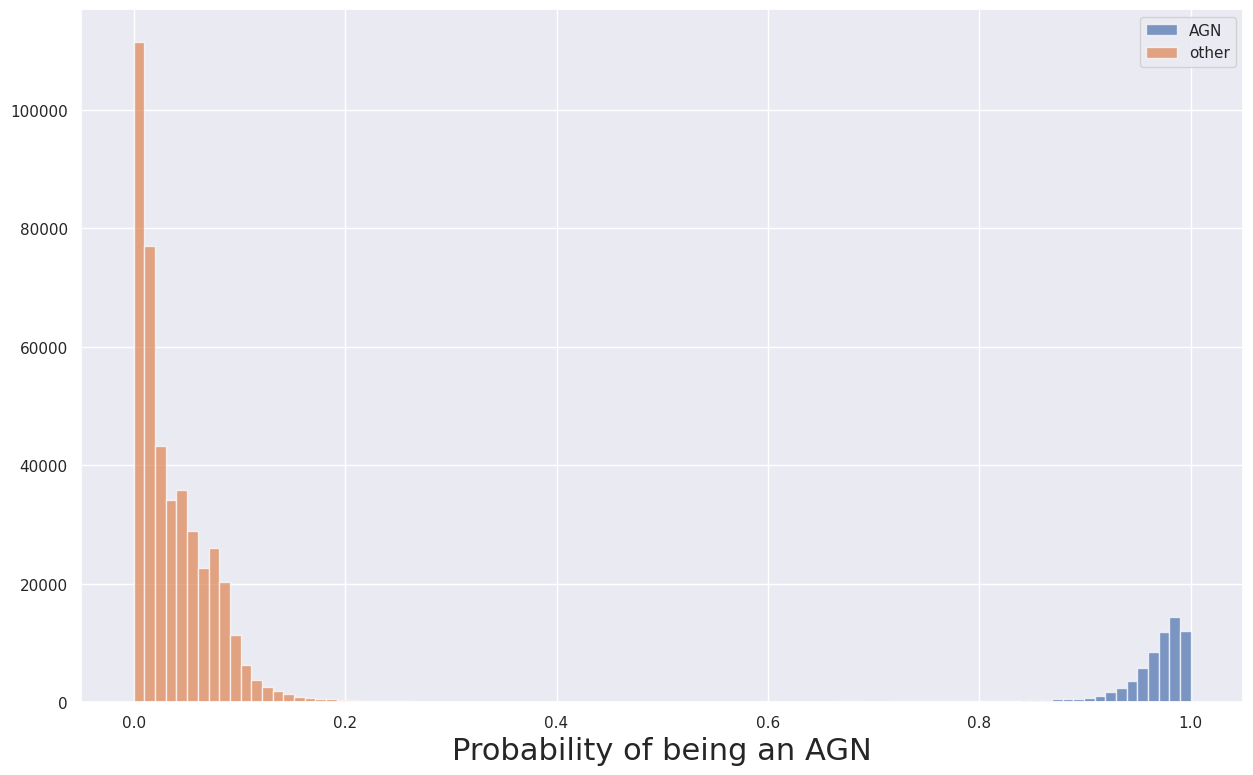

In [9]:
bins = np.linspace(0, 1, 100)

plt.figure(figsize=(15, 9))
plt.hist(proba[y==1], bins=bins, alpha=0.7, label='AGN')
plt.hist(proba[y==0], bins=bins, alpha=0.7, label='other')
plt.xlabel('Probability of being an AGN', fontsize=22)
#plt.yscale("log")
plt.legend()